# analysis portion with some visualization [1]

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# dispay top 5 rows of the dataset
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


-age
- sex
- chest pain type(4 values)
    -value 0:typical angina
    -value 1: antypical angina
    -value 2: non-anginal pain
    -value 3: asymptomatic 
-trestbps: resting blood pressure(in mm Hg admission to the hospital)
-chol: serum cholestrol in mg/dl
-fbs:(fasting blood sugar>120 mg/dl) (1=true 0=false)
-restecg:resting electrocardiographic results
    -value 0: normal
    -value 1: having ST-T wave abnormality(T wave inversions and/or ST elevation or depression of>0.05 mV)
    -value 2: showing probabe or definite left ventricular hypertrophy by Estes' criteria.
thalalch: max heart rate achieved.
-oldpeak: ST depression induced by exercise relative to rest.
-slope: the slope of the peak exercise ST segment
    -Value 1: unslopping
    -Value 2: flat
    -Value 3: downslopping
-ca: number of major vessels(0-3) colored by flouroscopy
-thal: 3 =normal, 6=fixed defect 7=reversable defect
-target: 0=less chance of heart attack, 1=more chance of heart attack

In [24]:
# check last 5 rows of the dataset
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [25]:
# shape of our dataset(no of rows and no columns)
data.shape

(1025, 14)

In [26]:
# get information about our dataset like total rows, total columns,
# data types, datatypes of each column and memory requirement
print("Number of rows", data.shape[0])
print("Number of columns", data.shape[1])

Number of rows 1025
Number of columns 14


In [27]:
# check null values 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [28]:
# check null values in dataset
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [29]:
# check for duplicacies and drop them
data_dup = data.duplicated().any()
print(data_dup)

True


In [30]:
data = data.drop_duplicates()

In [31]:
data.shape

(302, 14)

In [32]:
# get overall statistics about the dataset
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# draw correlation matrix

<AxesSubplot:>

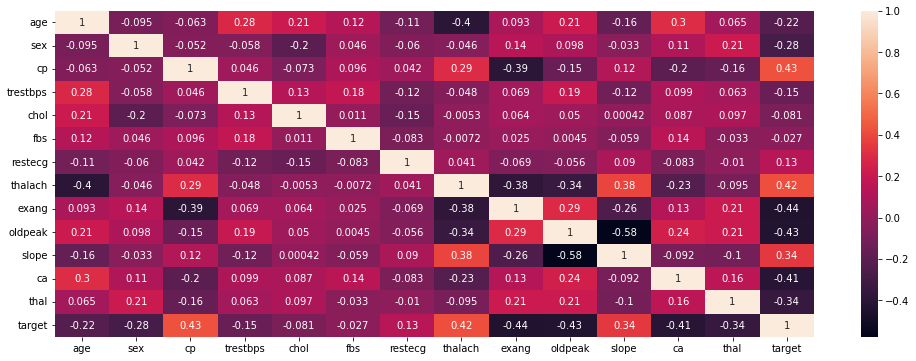

In [36]:
plt.figure(figsize=(17,6))
sns.heatmap(data.corr(), annot=True)

from this correlation we can see that:
        -cp, thalach and slope show positive correlation with target       value
    -oldpeak, exang, ca, thal, sex, and age shows a good negative
    correlation with target value
    -fbs, chol, trestbps shows low correlation with target value.
    
    

## how many people have heart disease and how many dont in this
## dataset [soluntion below]


In [ ]:
data.columns

In [39]:
data['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

C:\Users\MSI\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

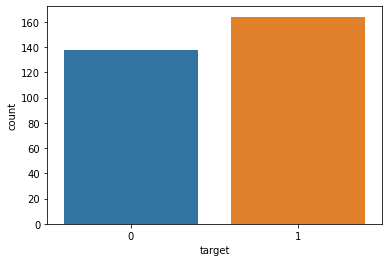

In [41]:
sns.countplot(data['target'])
# 0 = no heart disease
#  1 = hear disease

# find count of male and female in dataset


In [44]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [43]:
data['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

C:\Users\MSI\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


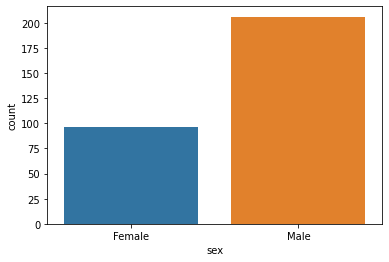

In [47]:
sns.countplot(data['sex'])
plt.xticks([0, 1],['Female', 'Male'])
plt.show()
# about 70 percent male and 30 percent female

# find gender distribution

In [49]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

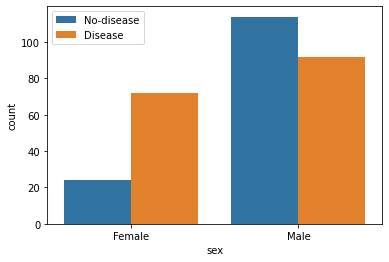

In [59]:
sns.countplot(x='sex', hue='target', data=data)
plt.xticks([1,0],['Male', 'Female'])
plt.legend(labels=['No-disease', 'Disease'])
plt.show()

# check age distribution

C:\Users\MSI\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


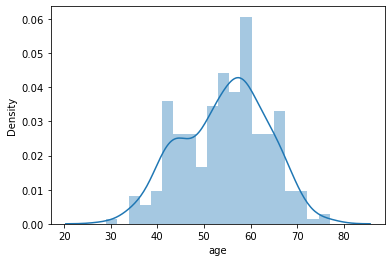

In [60]:
sns.distplot(data['age'], bins=20)
plt.show()
# most age group of people are from 50-60

# Check Chest pain type
 chest pain type(4 values)
    value 0: typical angina
    value 1: atypical angina
    value 2: non anginal pain
    value 3: asymptomatic


C:\Users\MSI\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


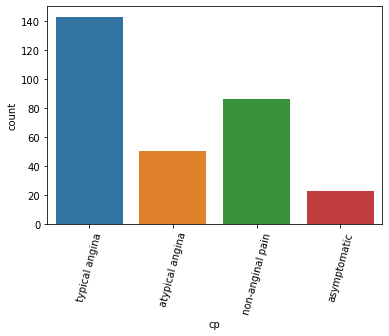

In [68]:
sns.countplot(data['cp'])
plt.xticks([0, 1, 2, 3], ["typical angina","atypical angina",
                           "non-anginal pain","asymptomatic"])
plt.xticks(rotation=75)
plt.show()

# Show chest pain distribution as per target variable

In [69]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

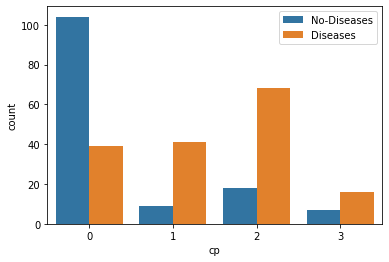

In [72]:
sns.countplot(x="cp", hue="target", data=data)
plt.legend(labels=["No-Diseases", "Diseases"])
plt.show()
# hence chest pain is subjective
# healthy people having chest pain is normal as shown in graph

# show fasting blood sugar distribution according to target variable

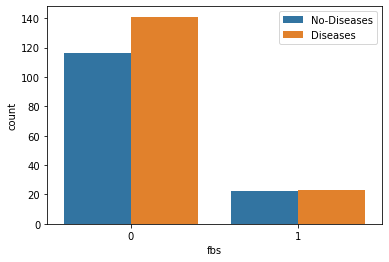

In [74]:
sns.countplot(x="fbs", hue="target", data=data)
plt.legend(labels=["No-Diseases", "Diseases"])
plt.show()
# fbs(fasting blood sugar) is diabetes indicator with fbs>120 is
# considered diabetic
# from here you can see higher no of heart patient without diabetes

# compare resting blood pressure distribution

In [75]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<AxesSubplot:>

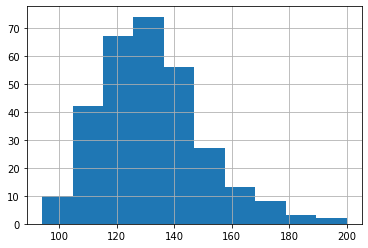

In [76]:
data['trestbps'].hist()
# from this histogram we can see the blood pressure of people are
# between 120-130

# compare resting blood pressure as per sex column

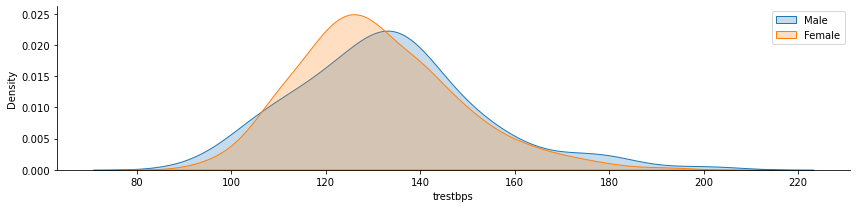

In [79]:
g = sns.FacetGrid(data,hue="sex", aspect=4)
g.map(sns.kdeplot, 'trestbps', shade=True)
plt.legend(labels=['Male', 'Female'])
# from this we see female has lower resting blood pressure than men 

# show distribution of serum cholestrol

In [80]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<AxesSubplot:>

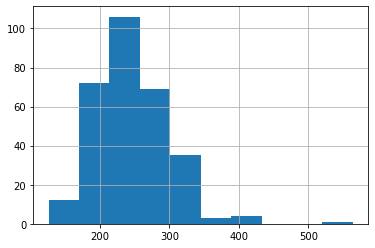

In [81]:
data['chol'].hist()
# measured in mg/dl
# healthy seum cholestrol is >200mg/dl

# plot continuous variables

In [82]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [83]:
cate_val=[]
cont_val=[]
for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)
        

In [84]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [85]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

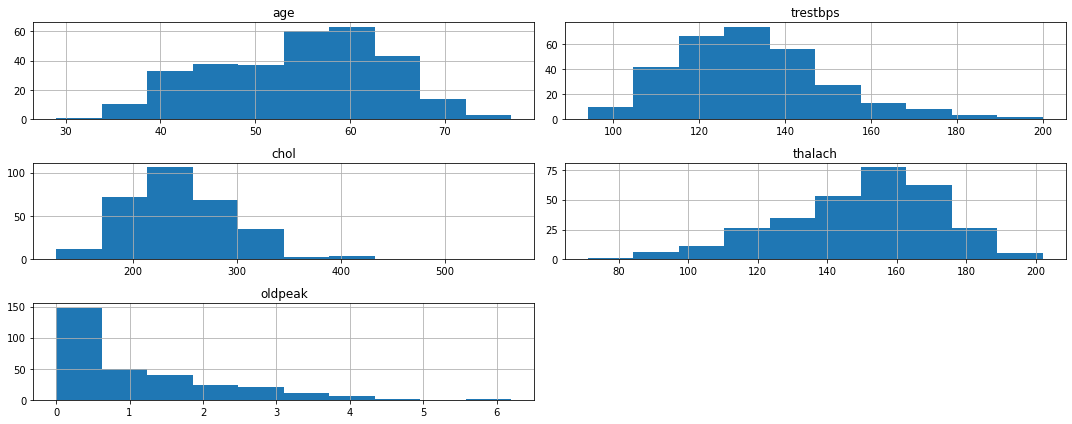

In [89]:
data.hist(cont_val, figsize=(15,6))
plt.tight_layout()
plt.show()
# distribution of continuous variables

# from here we focus onto machine learning part [2]


In [ ]:
import pandas as pd

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [15]:
# check null values in dataset
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
#check for duplicate values
data_dup=data.duplicated().any()

In [18]:
data_dup
#if its true then you have duplicate values

True

In [19]:
data = data.drop_duplicates()

In [20]:
data_dup=data.duplicated().any()

In [21]:
data_dup

False

In [9]:
#data processing
cate_val = []
cont_val = []

for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
        
    else:
        cont_val.append(column)
        
            
    

In [10]:
cate_val #categorical value

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [11]:
cont_val #numerical value

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [12]:
#encoding categorical data
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [13]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data, columns=cate_val, drop_first=True)

In [14]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [15]:
#feature scaling
from sklearn.preprocessing import StandardScaler

In [16]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [17]:
# splitting the dataset into training set and test set
x = data.drop('target', axis=1)

In [18]:
y = data['target']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [21]:
x_train

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
163,-0.710788,1,-0.433587,0.532247,0.718568,-0.468334,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
291,0.396267,1,-0.205463,0.241930,-0.855851,1.687716,0,0,0,0,...,1,1,0,0,1,0,0,0,0,1
280,-1.042904,0,-0.091401,-0.241930,1.112172,-0.382092,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
85,-1.153610,1,-0.661712,-0.512893,0.893503,-0.899544,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
239,0.839089,0,1.049221,-0.048386,0.193761,0.307844,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,1.392616,1,-0.661712,-0.183867,-3.436149,-0.037124,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
77,0.949794,1,0.478910,-1.151589,-0.243577,2.550136,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
125,0.617678,0,1.049221,-0.125804,0.937237,-0.123366,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
522,1.392616,0,1.163283,0.590310,0.980971,-0.899544,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0


In [22]:
y_train

163    0
291    0
280    1
85     1
239    0
      ..
267    0
77     0
125    1
522    1
119    1
Name: target, Length: 241, dtype: int64

In [23]:
# Logistic Regression
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
log = LogisticRegression()
log.fit(x_train, y_train)

LogisticRegression()

In [26]:
y_pred1 = log.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_test, y_pred1)
#our logistic regression is around 79 percent accurate for this dataset

0.7868852459016393

In [29]:
#SVC
from sklearn import svm

In [30]:
svm = svm.SVC()

In [31]:
svm.fit(x_train, y_train)

SVC()

In [32]:
y_pred2 = svm.predict(x_test)

In [33]:
accuracy_score(y_test, y_pred2)
#our support vector classifier is around 80 percent accurate for this dataset

0.8032786885245902

In [34]:
#KNeighbours Classifier
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn = KNeighborsClassifier()

In [36]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [37]:
y_pred3=knn.predict(x_test)

In [38]:
accuracy_score(y_test, y_pred3)
#k neighbors classifier is around 73 percent accurate for this dataset

0.7377049180327869

In [39]:
score = []
for k in range (1, 40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    score.append(accuracy_score(y_test, y_pred))
    

In [40]:
score
#accuracy score for different values of k

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [41]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy_score(y_test,y_pred)
#Now accuracy score has increased by 80 percent which was 74 earlier

0.8032786885245902

In [42]:
#Non-linear ml algorithms
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [43]:
data = data.drop_duplicates()

In [44]:
data.shape

(302, 14)

In [45]:
x = data.drop('target', axis=1)
y = data['target']

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [47]:
#DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier

In [48]:
dt = DecisionTreeClassifier()

In [49]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [50]:
y_pred4 = dt.predict(x_test)

In [51]:
accuracy_score(y_test, y_pred4)
#decision tree is this much percent accurate for this dataset.

0.7213114754098361

In [52]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [53]:
rf = RandomForestClassifier()

In [54]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [55]:
y_pred5 = rf.predict(x_test)
accuracy_score(y_test, y_pred5)
#this way we can find this much percent accuracy of random forest classifier for this dataset.

0.8524590163934426

In [56]:
#Gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

In [57]:
gbc = GradientBoostingClassifier()

In [58]:
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [59]:
y_pred6 = gbc.predict(x_test)

In [60]:
accuracy_score(y_test, y_pred6)
#gradient boosting classifier is this much accurate for this dataset

0.8032786885245902

In [61]:
final_data = pd.DataFrame({'Models': [
    'LR','SVM','KNN','DT','RF','GB'
], 'ACC':[accuracy_score(y_test, y_pred1),
         accuracy_score(y_test, y_pred2),
         accuracy_score(y_test, y_pred3),
         accuracy_score(y_test, y_pred4),
         accuracy_score(y_test, y_pred5),
         accuracy_score(y_test, y_pred6)]})

In [62]:
final_data
#by this we can see rf is the best model for our dataset

,Models,ACC
0,LR,0.786885
1,SVM,0.803279
2,KNN,0.737705
3,DT,0.721311
4,RF,0.852459
5,GB,0.803279


In [63]:
import seaborn as sns

C:\Users\MSI\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

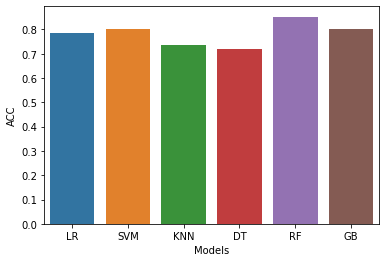

In [64]:
sns.barplot(final_data['Models'], final_data['ACC'])

In [65]:
x = data.drop('target', axis=1)
y = data['target']

In [66]:
x.shape

(302, 13)

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rf = RandomForestClassifier()
rf.fit(x,y)

RandomForestClassifier()

In [69]:
#PREDICTION ON NEW DATA
import pandas as pd

In [70]:
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3,
}, index=[0])

In [71]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [72]:
p = rf.predict(new_data)
if p[0]==0:
    print("No heart disease found!!!")
else:
    print("You might have heart disease, please consult a doctor")

No heart disease found!!!


In [73]:
#Save model using joblib
import joblib

In [74]:
joblib.dump(rf, 'model_joblib_heart')

['model_joblib_heart']

In [75]:
model = joblib.load('model_joblib_heart')

In [76]:
model.predict(new_data)

array([0], dtype=int64)

In [77]:
##GUI part
from tkinter import *
import joblib

In [ ]:
from tkinter import *
import joblib
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    model = joblib.load('model_joblib_heart')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13]])
    
    if result == 0:
        Label(master, text="No Heart Disease detected").grid(row=31)
    else:
        Label(master, text="Possibility of Heart Disease please consult a doctor").grid(row=31)
    
    
master = Tk()
master.title("Heart Disease Prediction System")


label = Label(master, text = "Heart Disease Prediction System"
                          , bg = "red", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male[1], Female[0]").grid(row=2)
Label(master, text="Constrictive pericarditis(CP)").grid(row=3)
Label(master, text="trestbps(resting blood pressure)").grid(row=4)
Label(master, text="chol(Cholesterol)").grid(row=5)
Label(master, text="fbs(Fasting blood sugar)").grid(row=6)
Label(master, text="restecg(Resting electrocardiographic measurement)").grid(row=7)
Label(master, text="thalach(maximum heart rate achieved)").grid(row=8)
Label(master, text="exang(exercise induced angina)").grid(row=9)
Label(master, text="oldpeak(exercise relative to rest)").grid(row=10)
Label(master, text="slope(ST/heartrate)").grid(row=11)
Label(master, text="ca(coronary artery calcium)").grid(row=12)
Label(master, text="thal(Thalassemia)").grid(row=13)



e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)



Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

C:\Users\MSI\miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\MSI\miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
